# Non-negative PARAFAC Decomposition of IL-2 Response Data
Here we will provide an example of how to use non-negative PARAFAC tensor decomposition to both reduce the dimensionality of a tensor of experimental data, as well as make insights regarding the underlying structure of that data. To do this, we will work with a tensor of experimentally measured cell signaling data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets.imports import IL2data
from tensorly.decomposition import non_negative_parafac

Here we will load a tensor of experimentally measured cellular responses to IL-2 stimulation. IL-2 is a naturally occurring immune signaling molecule which has been engineered and mutated in attempts to alter its signaling activity, and increase or decrease its interactions with particular cell types. Here, our data contains the responses of 8 different cell types to 13 different IL-2 mutants, at 4 different timepoints, at 12 standardized IL-2 concentrations. 

Therefore, our tensor will have shape (13 x 4 x 12 x 8), with dimensions representing IL-2 mutant, stimulation time, dose, and cell type respectively.

In [2]:
responseTensor, labels = IL2data()
IL2mutants, cells = labels
responseTensor.shape #mutant, time, dose, cells

(13, 4, 12, 8)

Now we will run non-negative PARAFAC tensor decomposition to reduce the dimensionality of our tensor. We will use 3 components, and normalize our resulting tensor to aid in future comparisons of correlations across components.

In [3]:
tensorFact = non_negative_parafac(np.nan_to_num(responseTensor), init='random', rank=3, mask=np.isfinite(responseTensor), n_iter_max=5000, tol=1e-9, random_state=1)
tensorFact.normalize()

Now we will load the names of our cell types and IL-2 mutants, in the order in which they are present in our original tensor. IL-2 mutant names refer to the specific mutations made to their amino acid sequence, as well as their valency format (monovalent or bivalent).

Finally, we label, plot, and analyze our factored tensor of data.

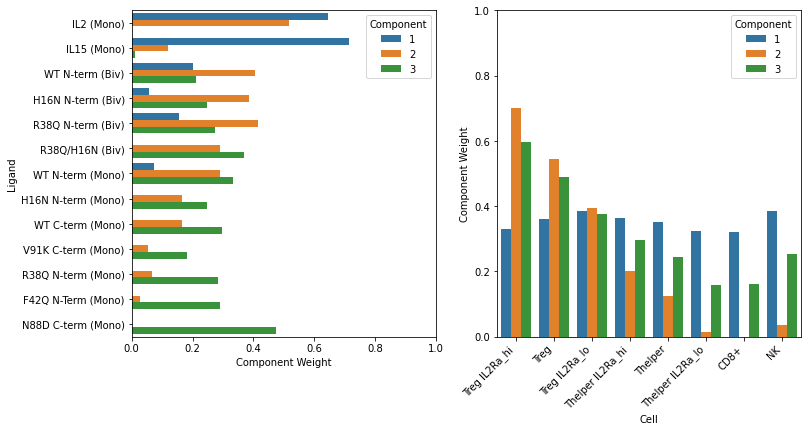

In [4]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))

ligFacs = tensorFact[1][0]
tFacDFlig = pd.DataFrame()
for i in range(0, 3):
    tFacDFlig = tFacDFlig.append(pd.DataFrame({"Component_Val": ligFacs[:, i], "Component": (i + 1), "Ligand": IL2mutants}))

sns.barplot(data=tFacDFlig, ax=ax[0], x="Component_Val", y="Ligand", hue="Component")
ax[0].set(xlabel="Component Weight", xlim=(0, 1))


cellFacs = tensorFact[1][3]
tFacDFcell = pd.DataFrame()
for i in range(0, 3):
    tFacDFcell = tFacDFcell.append(pd.DataFrame({"Component_Val": cellFacs[:, i], "Component": (i + 1), "Cell": cells}))

sns.barplot(data=tFacDFcell, ax=ax[1], x="Cell", y="Component_Val", hue="Component")
ax[1].set(ylabel="Component Weight", ylim=(0, 1))
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right");


Here we observe the correlations which both ligands and cell types have with each of our three components - we can interepret our tensor factorization for looking for patterns among these correlations. For example, we can see that bivalent mutants generally have higher correlations with component two, as do regulatory T cells. Thus we can infer that bivalent ligands activate regulatory T cells more than monovalent ligands. We also see that this relationship is strengthened by the availability of IL2Rα, one subunit of the IL-2 receptor.

This is just one example of an insight we can make using tensor factorization. By plotting the correlations which time and dose have with each component, we could additionally make inferences as to the dynamics and dose dependence of how mutations affect IL-2 signaling in immune cells.